In [1]:
# 任意分隔化(arbitrary discretization)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


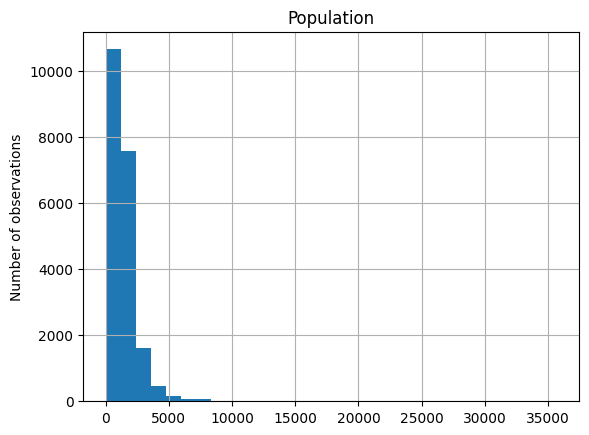

In [3]:
# 透過pandas進行任意分隔化(arbitrary discretization)
# let's plot a histogram to understand the
# variable's value range.

X["Population"].hist(bins=30)
plt.title("Population")
plt.ylabel("Number of observations")
plt.show()

In [4]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 200, 500, 1000, 2000, np.Inf]

# bin labels - we will use with pandas cut()
labels = ["0-200", "200-500", "500-1000", "1000-2000", ">2000"]

In [5]:
# discretize variable: use labels for the intervals

X["Population_range"] = pd.cut(
    X["Population"],
    bins=intervals,
    labels=labels,
    include_lowest=True,
)

# discretize variable: use interval limits

X["Population_limits"] = pd.cut(
    X["Population"],
    bins=intervals,
    labels=None,
    include_lowest=True,
)


# plot the original and 2 versions of the discretized variable

X[["Population", "Population_range", "Population_limits"]].head()

,Population,Population_range,Population_limits
0,322.0,200-500,"(200.0, 500.0]"
1,2401.0,>2000,"(2000.0, inf]"
2,496.0,200-500,"(200.0, 500.0]"
3,558.0,500-1000,"(500.0, 1000.0]"
4,565.0,500-1000,"(500.0, 1000.0]"


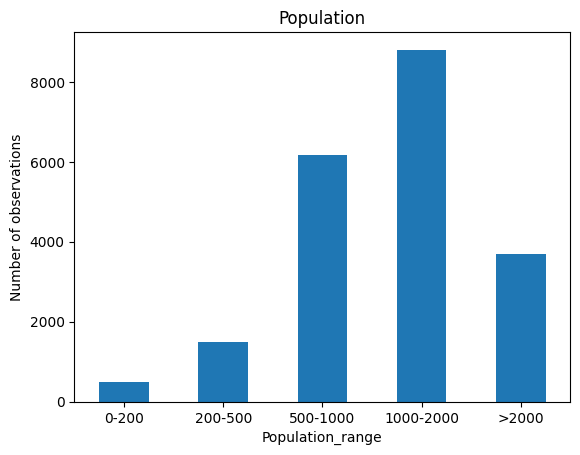

In [6]:
# let's check the number of observations per bin

X["Population_range"].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of observations")
plt.title("Population")
plt.show()

In [7]:
# 透過Feature-engine進行任意分隔化(arbitrary discretization)
from feature_engine.discretisation import ArbitraryDiscretiser

In [8]:
# load the California House price data from Scikit-learn

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [9]:
discretizer = ArbitraryDiscretiser(
    binning_dict={"Population": intervals},
    return_boundaries=True,
)

X_t = discretizer.fit_transform(X)

X_t["Population"].value_counts(normalize=True).sort_index()

Population
(-0.001, 200.0]     0.023934
(1000.0, 2000.0]    0.426502
(200.0, 500.0]      0.071996
(2000.0, inf]       0.178295
(500.0, 1000.0]     0.299273
Name: proportion, dtype: float64

In [10]:
X_t.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,"(200.0, 500.0]",2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,"(2000.0, inf]",2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,"(200.0, 500.0]",2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,"(500.0, 1000.0]",2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,"(500.0, 1000.0]",2.181467,37.85,-122.25
